In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import hdbscan

In [4]:
# read dataset
url = 'https://raw.githubusercontent.com/svetryabova/NMHUcovid19/vglebov/data/usa_county_dataset.csv'
data = pd.read_csv(url)

In [5]:
# separate county names from data
counties = data.iloc[:, 0]
print(counties)

0            Autauga AL
1            Baldwin AL
2            Barbour AL
3               Bibb AL
4             Blount AL
             ...       
1034        Thurston NE
1035    Scotts Bluff NE
1036           Sarpy NE
1037          Saline NE
1038          Platte NE
Name: county, Length: 1039, dtype: object


In [6]:
data = data.iloc[:, 1:]

In [7]:
# normalize data
data = preprocessing.normalize(data, norm='max', axis=0)
print(np.max(data[:, 0]))

1.0


In [8]:
# apply k means
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [9]:
labels = kmeans.labels_

Text(0.5, 0, 'F4')

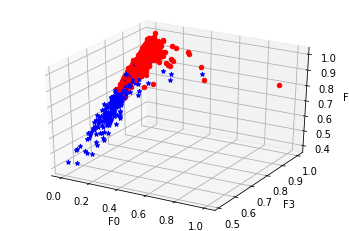

In [26]:
# visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    col = ''
    marker = ''
    if labels[i] == 0:
        col = 'r'
        marker = 'o'
    else:
        col = 'b'
        marker = '*'
    ax.scatter(data[i, 0], data[i, 3], data[i, 4], c=col, marker=marker)

ax.set_xlabel('F0')
ax.set_ylabel('F3')
ax.set_zlabel('F4')

In [19]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(data[:, 1:])
l = clusterer.labels_
print(set(l))

{0, 1, -1}


Text(0.5, 0, 'F4')

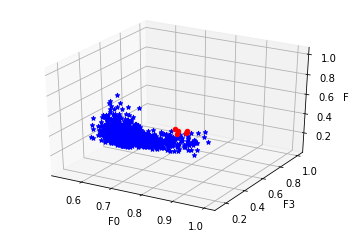

In [25]:
# visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    col = ''
    marker = ''
    if l[i] == 0:
        col = 'r'
        marker = 'o'
    elif l[i] == 1:
        col = 'b'
        marker = '*'
    else:
        col = 'k'
    ax.scatter(data[i, 1], data[i, 6], data[i, 7], c=col, marker=marker)

ax.set_xlabel('F0')
ax.set_ylabel('F3')
ax.set_zlabel('F4')

In [21]:
import collections
collections.Counter(l)

Counter({1: 888, -1: 145, 0: 6})

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN().fit(data)
l1 = db.labels_
collections.Counter(l1)

Counter({0: 1037, -1: 2})